# Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report)

# Import data and Explolatory data

In [10]:
df = pd.read_csv("data/churn.csv")
df["churn"] = df["churn"].map({"Yes":1, "No":0})
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int64  
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

# Change Data type

In [9]:
def convert_obj_columns_to_category(data):
    for c in data.columns:
        col_type = data[c].dtype
        if col_type == 'object' or col_type.name == 'category':
            data[c] = data[c].astype('category')
    return data

df = convert_obj_columns_to_category(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   churn                       5000 non-null   int64   
 1   accountlength               5000 non-null   int64   
 2   internationalplan           5000 non-null   category
 3   voicemailplan               5000 non-null   category
 4   numbervmailmessages         5000 non-null   int64   
 5   totaldayminutes             5000 non-null   float64 
 6   totaldaycalls               5000 non-null   int64   
 7   totaldaycharge              5000 non-null   float64 
 8   totaleveminutes             5000 non-null   float64 
 9   totalevecalls               5000 non-null   int64   
 10  totalevecharge              5000 non-null   float64 
 11  totalnightminutes           5000 non-null   float64 
 12  totalnightcalls             5000 non-null   int64   
 13  totalnightcharge  

# 1. Split data and Encoding

In [76]:
## 1. split data
y = df["churn"]
X = df[["internationalplan", "numbervmailmessages", "totaldayminutes", "totaleveminutes", "totalnightminutes", "numbercustomerservicecalls"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [77]:
dummies = list([column for column in X_train.columns if (X_train[column].dtype == "category")])
print(dummies)
X_train = pd.get_dummies(X_train, columns=dummies, drop_first=True)
X_test = pd.get_dummies(X_test, columns=dummies, drop_first=True)

['internationalplan']


# 2. Train model

In [78]:
## 2. train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

1.0 0.919


# 3. Score and 4. Evaluate model

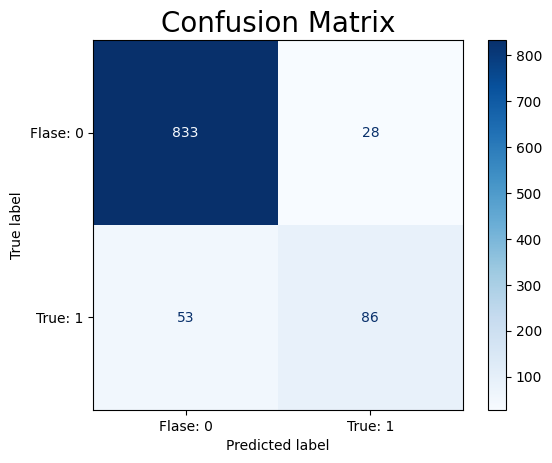

In [86]:
disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Flase: 0','True: 1']
)
plt.title("Confusion Matrix", size=20)
plt.show()

In [95]:
np.mean(y_test == 0)

0.861

In [91]:
print("Classification Report of Train Data:")
print(classification_report(y_train, model.predict(X_train)))

Classification Report of Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3432
           1       1.00      1.00      1.00       568

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [92]:
print("Classification Report of Test Data:")
print(classification_report(y_test, model.predict(X_test)))

Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       861
           1       0.75      0.62      0.68       139

    accuracy                           0.92      1000
   macro avg       0.85      0.79      0.82      1000
weighted avg       0.91      0.92      0.92      1000

